In [1]:
import pandas as pd

In [2]:
EXCEL_PATH = "/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Daten/crypto_7years_daily.xlsx"

In [9]:
import pandas as pd
from backtester import Backtester
from strategies.trend_following import TrendFollowingStrategy
from strategies.mean_reversion import MeanReversionStrategy

strategy_class = TrendFollowingStrategy
param_grid = {
    "window": range(10,300,20),
}
initial_cash = 10000

# Load all sheet names (one per asset)
xls = pd.read_excel(EXCEL_PATH,sheet_name="Cleaned data", parse_dates=["DATES"])
xls.drop_duplicates(inplace=True)
xls.set_index("DATES", inplace=True)

from itertools import product

def get_param_combinations(grid):
    keys = list(grid.keys())
    values = list(grid.values())
    for combo in product(*values):
        yield dict(zip(keys, combo))

results = []


In [10]:
xls.head()

,Enjin Coin,Maker,Solana,Cardano,Monero,Litecoin,Dogecoin,Chainlink,Bitcoin,XRP,...,Tether,Dai,USD Coin,Basic Attention Token,Cosmos,Cosmos.1,TerraUSD,Decentraland,Shiba Inu,Aave
DATES,,,,,,,,,,,,,,,,,,,,,
2018-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-11,NaN,NaN,NaN,NaN,NaN,189.485,NaN,NaN,9613.95,0.8200,...,0.9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-12,NaN,NaN,NaN,NaN,NaN,178.825,NaN,NaN,9017.65,0.7819,...,0.9989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-13,NaN,NaN,NaN,NaN,NaN,174.265,NaN,NaN,9062.92,0.7697,...,1.0016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-14,NaN,NaN,NaN,NaN,NaN,162.745,NaN,NaN,8304.32,0.6988,...,0.9983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#get columns names in the dataframe
assets = xls.columns.tolist()

In [12]:
#calculate silence for each asset
# and run backtesting for each combination of parameters
for asset in assets:
    df = xls[[asset]]
    for params in get_param_combinations(param_grid):
        strategy = strategy_class(df.columns[0],**params)

        bt = Backtester(
            data=df.copy(),  # changed from file path to raw data
            strategy=strategy,
            initial_cash=initial_cash
        )
        bt.run()
        bt.evaluate(silent=True)

        result = {
            "asset": asset,
            **params,
            **bt.get_performance_metrics()  # e.g., return, sharpe
        }

        results.append(result)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by="total_return", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
print(results_df)


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:48: RuntimeWarning: invalid value encountered in scalar power
  annualized_return = (1 + total_return) ** (252 / len(self.results)) - 1
/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:48: RuntimeWarning: invalid value encountered in scalar power
  annualized_return = (1 + total_return) ** (252 / len(self.results)) - 1
/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:48: RuntimeWarning: invalid value encountered in scalar power
  annualized_return = (1 + total_return) ** (252 / len(self.results)) - 1


             asset  window  total_return  annualized_return  sharpe
0     Binance Coin      50       22.2567             0.4577    0.93
1          Bitcoin     110       20.8353             0.3713    1.03
2          Bitcoin     130       16.7256             0.3423    0.97
3          Bitcoin      50       16.2002             0.3382    0.97
4           Fantom      30       13.3021             0.6372    1.04
..             ...     ...           ...                ...     ...
745  Terra Classic     170       -1.0000            -0.8532   -0.81
746  Terra Classic     190       -1.0000            -0.8513   -0.84
747  Terra Classic     210       -1.0000            -0.8423   -0.79
748  Terra Classic     250       -1.0000            -0.8533   -0.88
749     Enjin Coin      10       -1.0000                NaN   -0.99

[750 rows x 5 columns]


In [16]:
results_df[results_df["asset"] == 'Ethereum'].sort_values(by="window", ascending=False)

,asset,window,total_return,annualized_return,sharpe
59,Ethereum,290,1.5786,0.1023,0.45
51,Ethereum,270,2.0417,0.1212,0.48
41,Ethereum,250,2.9235,0.1510,0.54
26,Ethereum,230,4.4599,0.1908,0.60
61,Ethereum,210,1.4253,0.0954,0.45
52,Ethereum,190,1.9969,0.1195,0.49
36,Ethereum,170,3.2321,0.1600,0.56
31,Ethereum,150,3.5823,0.1695,0.57
39,Ethereum,130,3.0760,0.1555,0.55
70,Ethereum,110,1.0831,0.0784,0.41


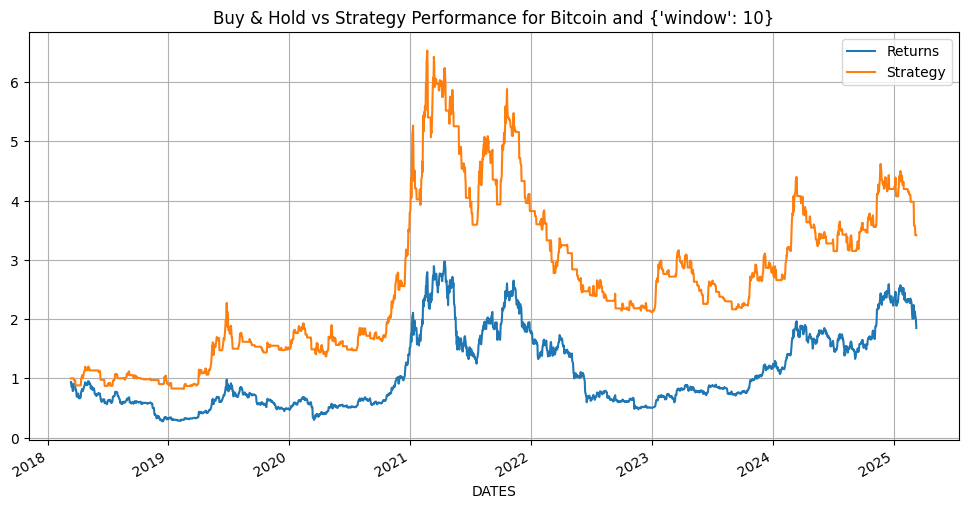

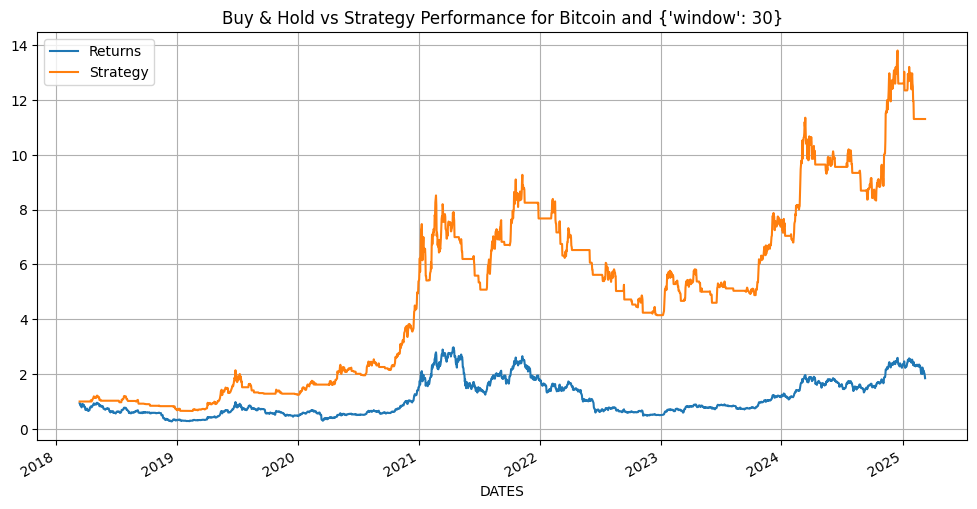

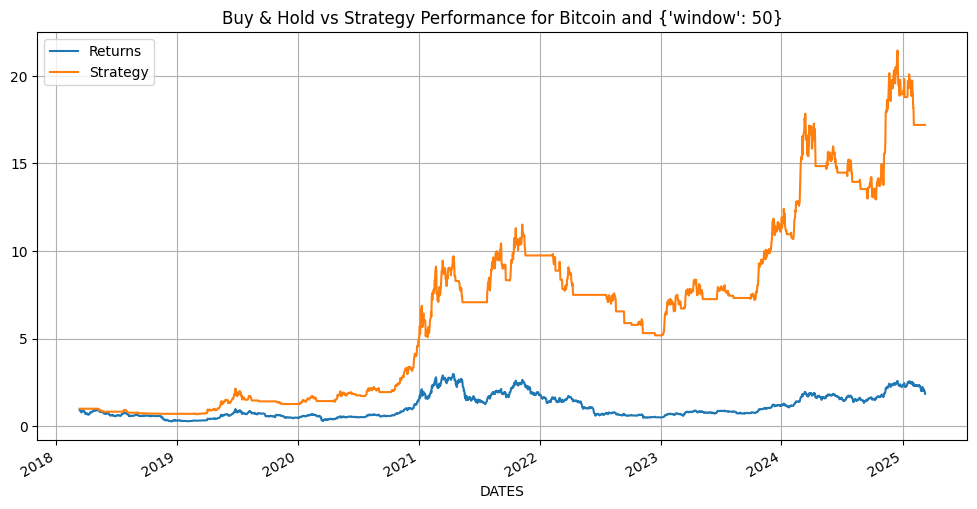

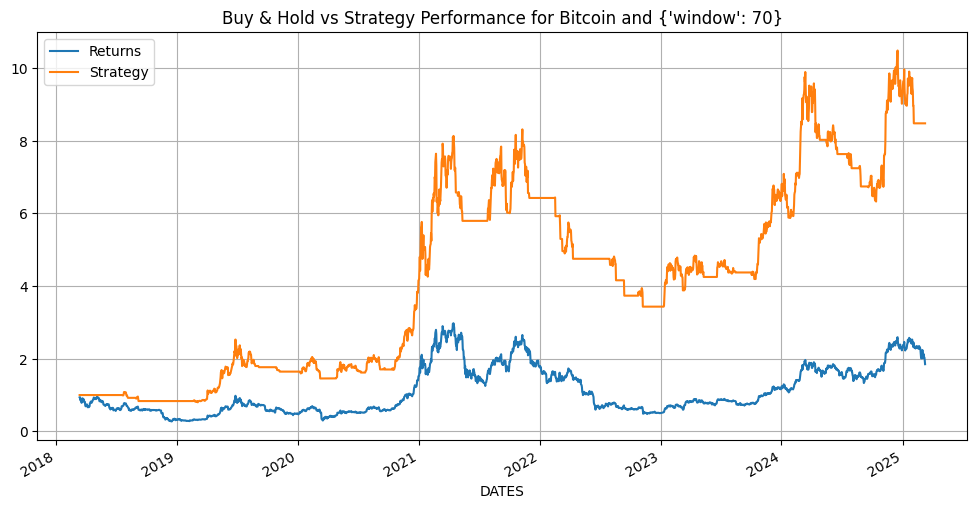

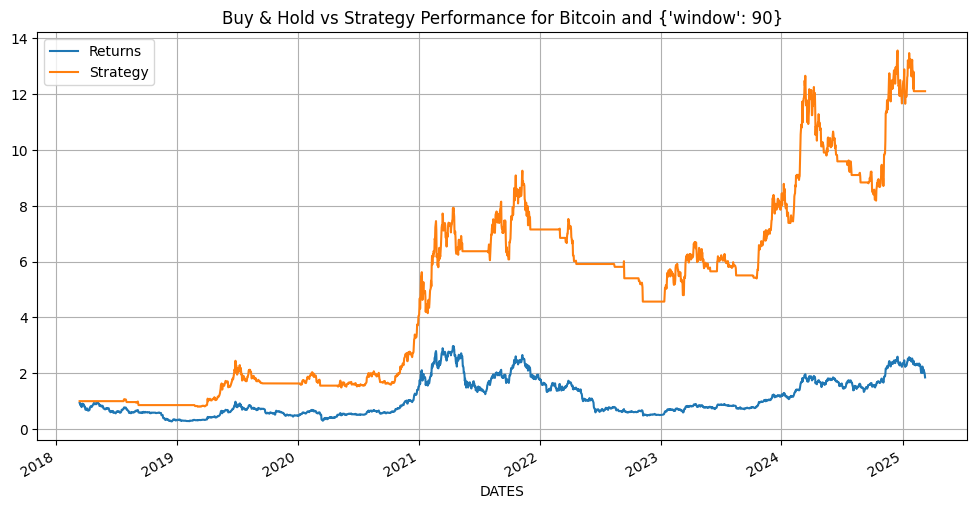

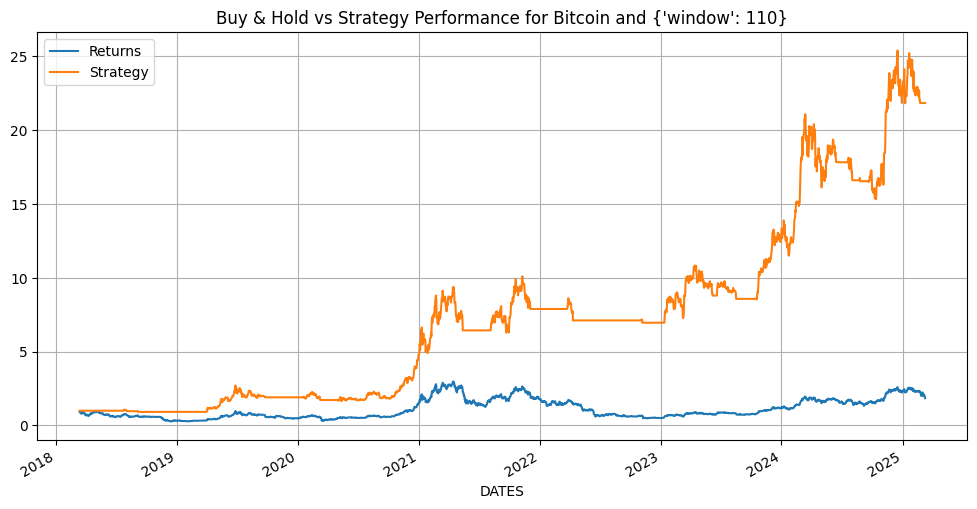

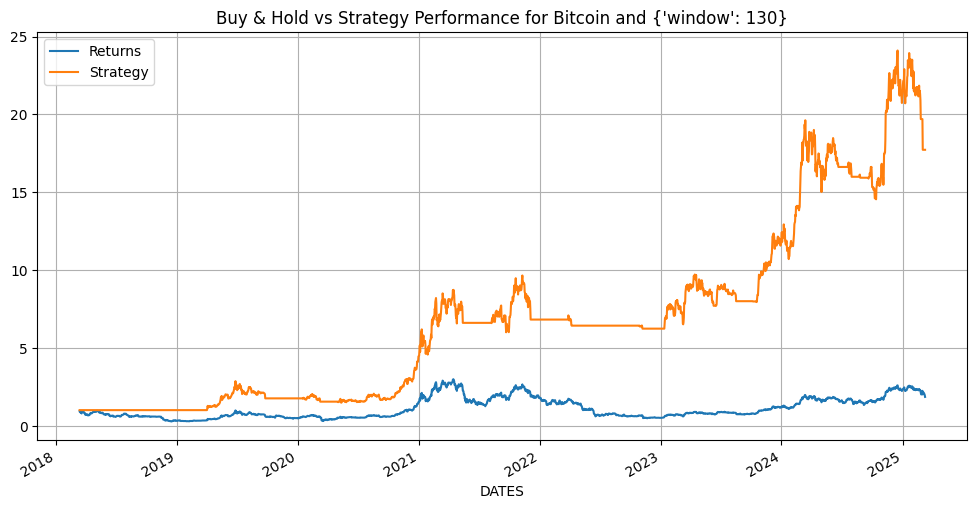

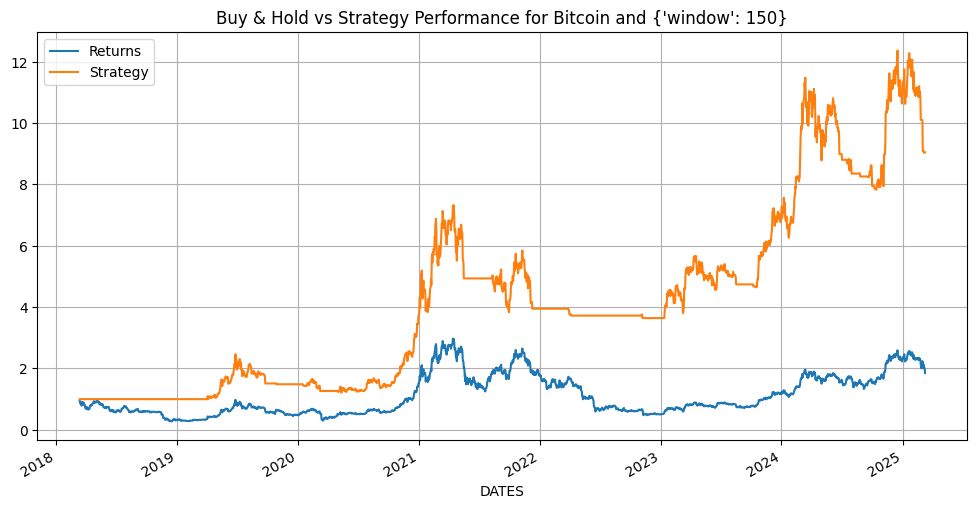

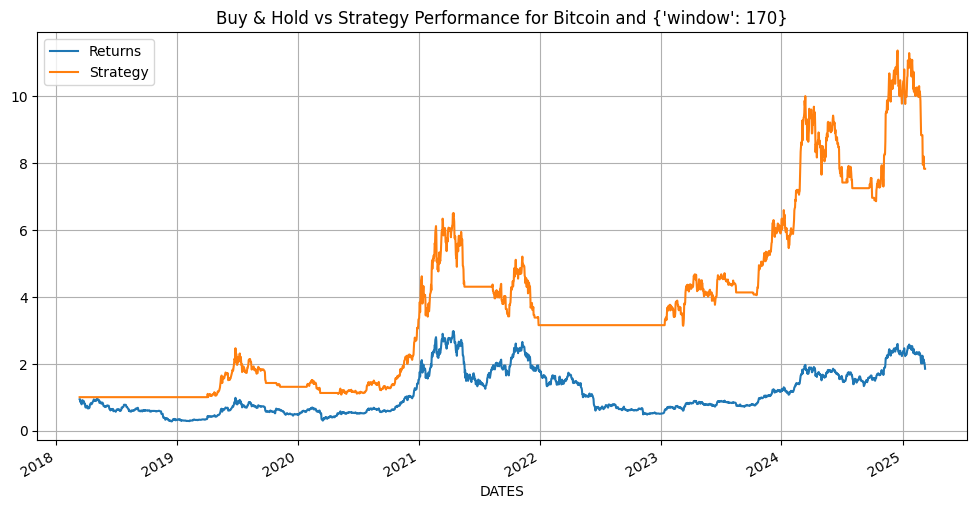

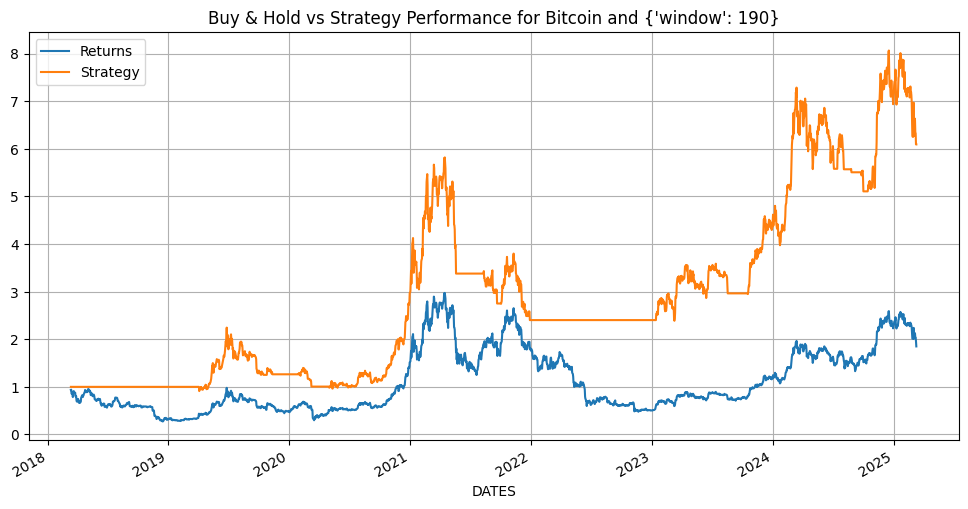

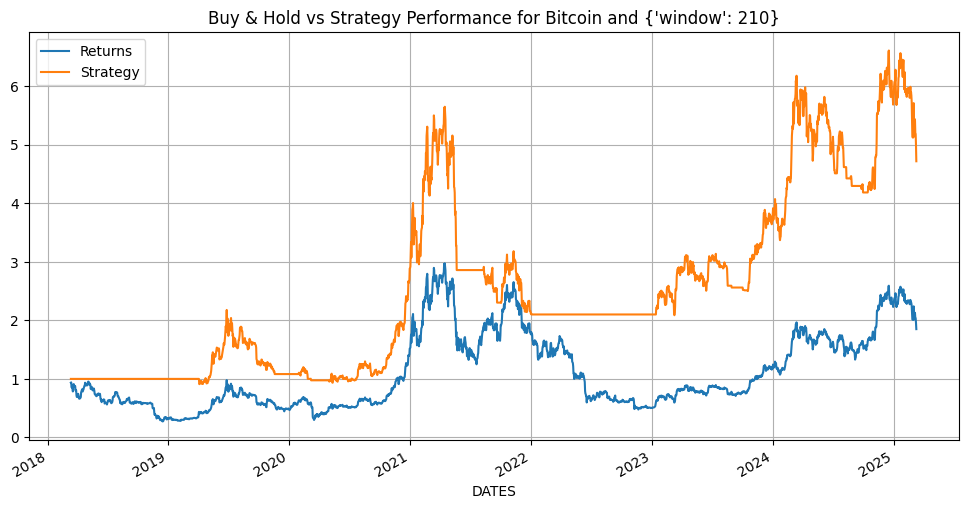

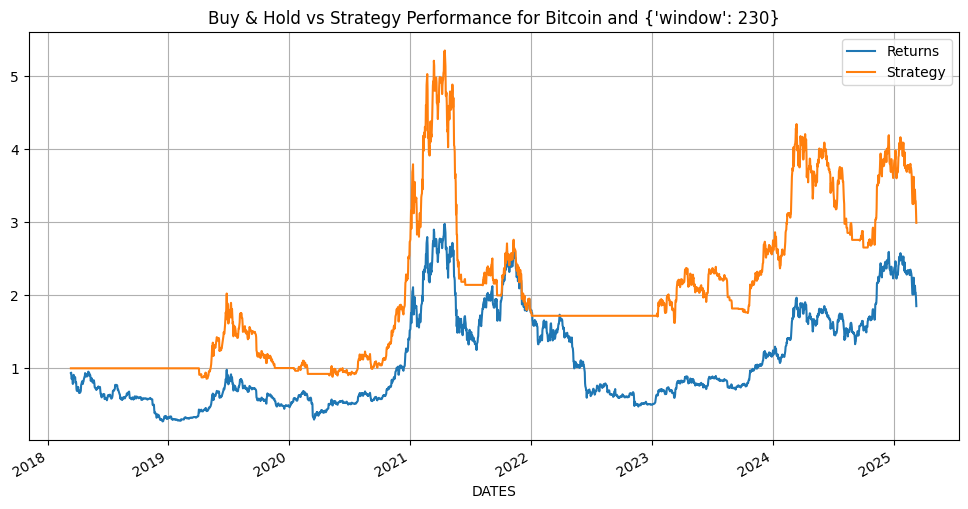

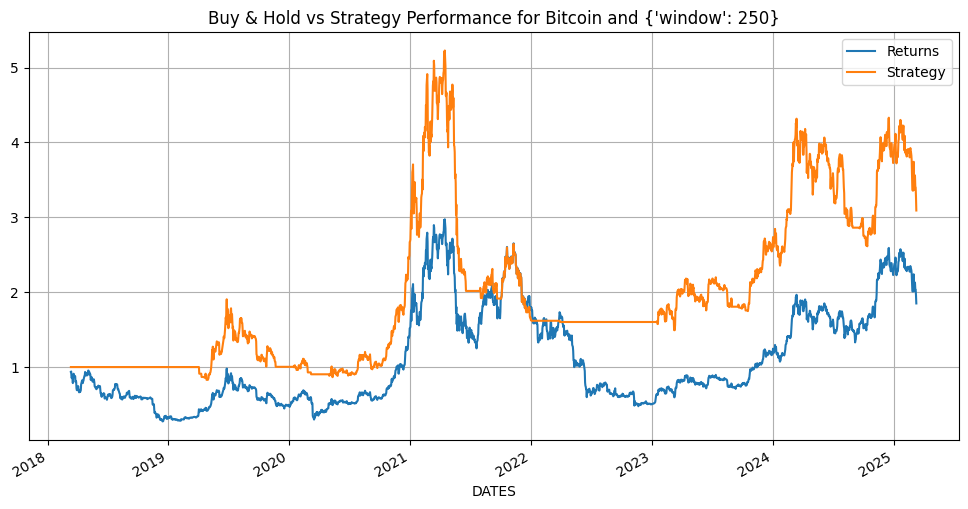

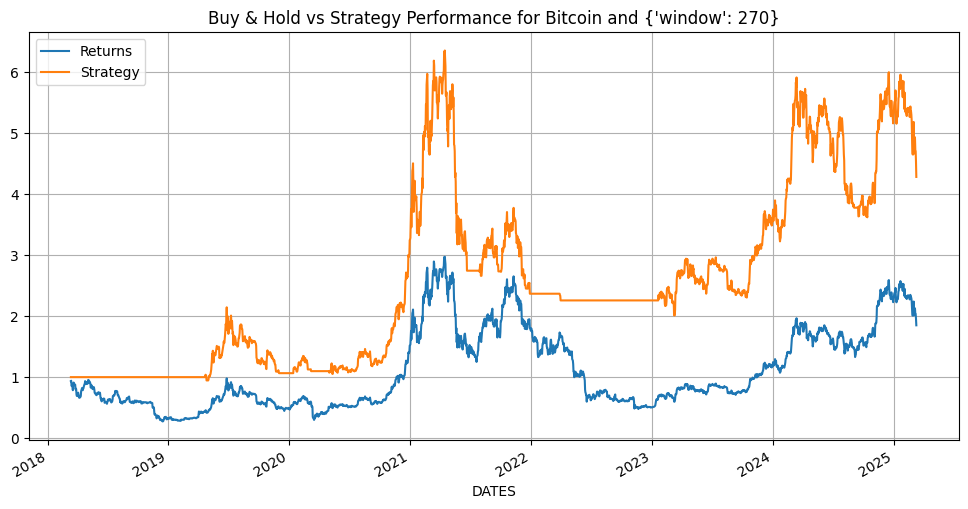

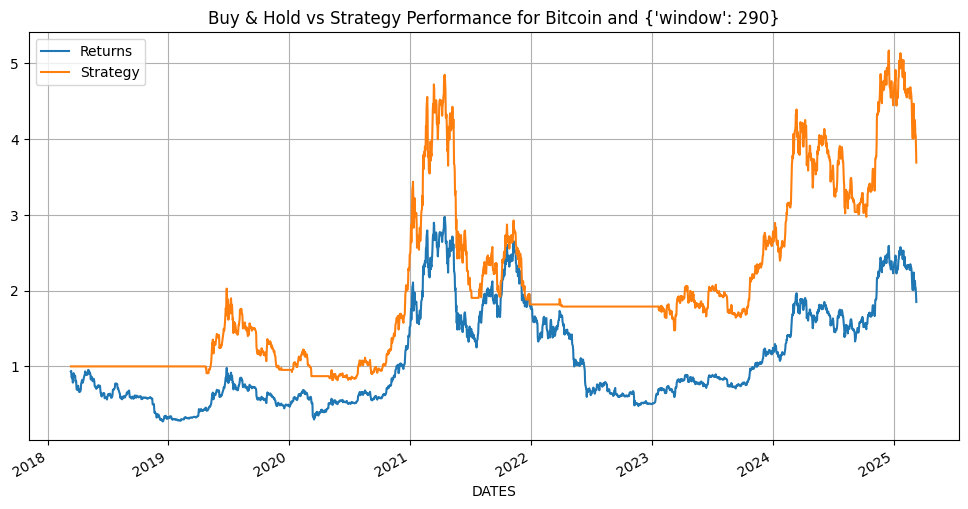

      asset  window  total_return  annualized_return  sharpe
0   Bitcoin     110       20.8353             0.3713    1.03
1   Bitcoin     130       16.7256             0.3423    0.97
2   Bitcoin      50       16.2002             0.3382    0.97
3   Bitcoin      90       11.0990             0.2908    0.87
4   Bitcoin      30       10.3006             0.2818    0.85
5   Bitcoin     150        8.0403             0.2529    0.79
6   Bitcoin      70        7.4771             0.2447    0.77
7   Bitcoin     170        6.8326             0.2346    0.75
8   Bitcoin     190        5.0927             0.2033    0.68
9   Bitcoin     210        3.7161             0.1721    0.61
10  Bitcoin     270        3.2821             0.1606    0.57
11  Bitcoin     290        2.6894             0.1430    0.53
12  Bitcoin      10        2.4174             0.1341    0.52
13  Bitcoin     250        2.0910             0.1225    0.49
14  Bitcoin     230        1.9885             0.1186    0.48


In [14]:
assets=['Bitcoin']
new_results = []
for asset in assets:
    df = xls[[asset]]
    for params in get_param_combinations(param_grid):
        strategy = strategy_class(df.columns[0],**params)

        bt = Backtester(
            data=df.copy(),
            strategy=strategy,
            initial_cash=initial_cash
        )
        bt.run()
        bt.evaluate(silent=True)
        bt.plot(params=params)

        result = {
            "asset": asset,
            **params,
            **bt.get_performance_metrics()
        }

        new_results.append(result)

# Convert results to DataFrame
new_results_df = pd.DataFrame(new_results)
new_results_df.sort_values(by="total_return", ascending=False, inplace=True)
new_results_df.reset_index(drop=True, inplace=True)
print(new_results_df)